# Capstone - FEMA Hazard Mitigation Regression Analysis

**By Rachel Beery**

**For my capstone I want to study community resilency and predict hazard mitigation success. I will be using the OpenFEMA datasets. My project will use supervised learning linear regression modeling to predict hazard mitigation success.**

**In this project we are using a regression analysis model to understand the ROI of hazard mitigation costs in USD. By understanding these patterns we will then provide recommendations on how to better allocate hazard mitigation funds in the future.**

Source: https://www.fema.gov/about/openfema/data-sets

### Goals: 
- Make a linear regression to see if there is a pattern overtime in hazard mitigation.
- Make a linear regression to see if there is a pattern overtime in recovery funds.
- Somehow bring these two together to see if certain hazard mitigation had more ROI
- Make categoricals for years

# Data Exploration and Cleaning

In [1]:
# We will begin by importing all of the packages we anticipate to use
import pandas as pd
import pandas.tseries  
import numpy as np  

import statsmodels.api as sm 
import itertools

import matplotlib.pyplot as plt   
from matplotlib.pylab import rcParams 
%matplotlib inline
import matplotlib.ticker as mtick
plt.style.use('ggplot') 
import plotly.express as px
import plotly.figure_factory as ff 
import plotly.graph_objects as go 
import seaborn as sns  

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore') 

import math
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from scipy import stats
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV
# CV - why not importing

from sklearn.feature_selection import VarianceThreshold, SelectFromModel
linreg = LinearRegression()

from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, precision_score, accuracy_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import xgboost

In [2]:
# Setting the display defaults
pd.set_option('display.max_columns', 0)
# pd.set_option('display.max_rows',)

# Turning off scientific notation in pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
#Import data and see the headers
df = pd.read_csv(r"HazardMitigationAssistanceProjects - HazardMitigationAssistanceProjects.csv")
df.head()

,region,stateNumberCode,state,countyCode,county,programArea,projectIdentifier,projectType,projectTitle,projectCounties,numberOfProperties,numberOfFinalProperties,status,subgrantee,costSharePercentage,projectAmount,federalShareObligated,programFy,dateInitiallyApproved,dateApproved,dateClosed,granteeTribalIndicator,grantee,disasterNumber,benefitCostRatio,netValueBenefits,subgranteeTribalIndicator,hash,lastRefresh,id
0,6,48,Texas,167.000,Galveston,HMGP,DR-1999-0061-R,"400.1: Utility Protective Measures (Electric, ...",UTMB Elevation of Electrical Services Bldg 9,GALVESTON,0,0,Closed,UNIVERSITY OF TEXAS MEDICAL BRANCH,0.750,402910.000,302181.820,2011,2013-12-10T05:00:00.000Z,2020-02-06T05:00:00.000Z,2020-02-06T05:00:00.000Z,0.000,Statewide,1999.000,4.041,2969310.000,0.000,a959dc8cb69df0bd7f236b2021101501,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd79
1,5,18,Indiana,21.000,Clay,HMGP,DR-1997-0014-R,200.1: Acquisition of Private Real Property (S...,City of Brazil Phase 2,CLAY,13,6,Closed,Brazil,0.620,366071.000,227383.000,2011,2013-04-09T04:00:00.000Z,2019-11-25T05:00:00.000Z,2019-11-25T05:00:00.000Z,0.000,Statewide,1997.000,1.357,961452.000,0.000,cb8464b16e232b502ef9c8a3d385752b,2020-09-17T18:15:38.771Z,5f63a7ca31a8c6681c9dfd81
2,7,19,Iowa,153.000,Polk,HMGP,DR-1998-0022-P,91.1: Local Multihazard Mitigation Plan,Polk Countywide Multi-Jurisdiction Multi-Hazar...,POLK,0,0,Closed,Polk (County),0.750,96965.000,72724.000,2011,2012-05-10T04:00:00.000Z,2015-07-28T04:00:00.000Z,2015-07-29T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,bd467ece18ecc6c8a40b824175b7f029,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd84
3,2,36,New York,83.000,Rensselaer,HMGP,DR-4020-0064-F,600.1: Warning Systems (as a Component of a Pl...,Canal Flood Warning System,OSWEGO; ONTARIO; SARATOGA; SCHENECTADY; SCHOHA...,0,0,Closed,THRUWY AUTH/NYS CANAL CORP,1.000,5932500.000,5932500.000,2011,2013-11-12T05:00:00.000Z,2014-11-07T05:00:00.000Z,2018-01-24T05:00:00.000Z,0.000,Statewide,4020.000,0.000,0.000,0.000,ab6774d20b7cd64215ded6135377cc1e,2021-01-19T17:38:38.392Z,5f63a7ca31a8c6681c9dfd87
4,7,19,Iowa,141.000,O'Brien,HMGP,DR-1998-0013-F,600.1: Warning Systems (as a Component of a Pl...,Sheldon Outdoor Warning Sirens Project,O'BRIEN,0,0,Closed,Sheldon,0.750,34245.000,25683.000,2011,2012-05-03T04:00:00.000Z,2012-05-03T04:00:00.000Z,2013-09-26T04:00:00.000Z,0.000,Statewide,1998.000,0.000,0.000,0.000,62fff845e7929eb2587b530b69ae2f93,2020-09-17T18:15:38.772Z,5f63a7ca31a8c6681c9dfd88


In [4]:
# Subgrantee consider keeping as it (Subgrantee add  university column etc.)
# Leave costSharePercentage

In [5]:
# How big is this dataset?
df.shape

(29628, 30)

In [6]:
# Looking to make sure out df is the correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 30 columns):
region                       29628 non-null int64
stateNumberCode              29628 non-null int64
state                        29628 non-null object
countyCode                   27586 non-null float64
county                       27586 non-null object
programArea                  29628 non-null object
projectIdentifier            29628 non-null object
projectType                  29301 non-null object
projectTitle                 29450 non-null object
projectCounties              27859 non-null object
numberOfProperties           29628 non-null int64
numberOfFinalProperties      29628 non-null int64
status                       29628 non-null object
subgrantee                   29133 non-null object
costSharePercentage          29608 non-null float64
projectAmount                29608 non-null float64
federalShareObligated        29628 non-null float64
programFy               

In [7]:
df.drop(axis=1, columns=['subgranteeTribalIndicator', 'lastRefresh', 
                         'granteeTribalIndicator', 'dateInitiallyApproved', 'dateApproved', 
                         'dateClosed', 'projectTitle', 'numberOfFinalProperties', 'subgrantee', 
                         'projectIdentifier', 'projectCounties', 'numberOfProperties',
                        'status', 'costSharePercentage', 'federalShareObligated', 'grantee', 
                         'disasterNumber', 'hash', 'id', 
                         'state','county', 'countyCode', 'projectType'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29628 entries, 0 to 29627
Data columns (total 7 columns):
region              29628 non-null int64
stateNumberCode     29628 non-null int64
programArea         29628 non-null object
projectAmount       29608 non-null float64
programFy           29628 non-null int64
benefitCostRatio    29628 non-null float64
netValueBenefits    24707 non-null float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.6+ MB


In [8]:
#df['countyCode'].fillna(0.0, axis = 0, inplace=True)
#df['countyCode'].value_counts()

In [9]:
#df['countyCode'] = df['countyCode'].astype('int64')

In [10]:
df.describe()

,region,stateNumberCode,projectAmount,programFy,benefitCostRatio,netValueBenefits
count,29628.000,29628.000,29608.000,29628.000,29628.000,24707.000
mean,5.170,27.841,815798.371,2006.716,171.556,9907805.571
std,2.420,17.182,8021291.971,7.576,20368.674,808951961.855
min,1.000,1.000,-1624776.000,1989.000,0.000,0.000
25%,4.000,12.000,37054.750,2001.000,0.000,0.000
50%,5.000,27.000,114895.500,2008.000,0.847,103985.000
75%,7.000,40.000,419440.250,2013.000,1.666,950061.000
max,10.000,78.000,729000000.000,2020.000,2479069.620,89843962103.000


In [11]:
# Bining the benefitCostRatio to be if above 1 or below 1 
df['Positive_ROI']=(df['benefitCostRatio']>=1).astype(int)
df['Positive_ROI']

0        1
1        1
2        0
3        0
4        0
        ..
29623    1
29624    0
29625    1
29626    0
29627    0
Name: Positive_ROI, Length: 29628, dtype: int32

In [12]:
df.head()

,region,stateNumberCode,programArea,projectAmount,programFy,benefitCostRatio,netValueBenefits,Positive_ROI
0,6,48,HMGP,402910.000,2011,4.041,2969310.000,1
1,5,18,HMGP,366071.000,2011,1.357,961452.000,1
2,7,19,HMGP,96965.000,2011,0.000,0.000,0
3,2,36,HMGP,5932500.000,2011,0.000,0.000,0
4,7,19,HMGP,34245.000,2011,0.000,0.000,0


In [13]:
df['Positive_ROI'].value_counts(normalize=True)

0   0.506
1   0.494
Name: Positive_ROI, dtype: float64

In [14]:
# Split the data into target and predictors
y = df['Positive_ROI']
X = df.drop(columns=['Positive_ROI'], axis=1)

In [15]:
# Using this as a target
# Using logistic regression to directly answer what returns a pos ROI

In [16]:
# Forcast demand with a times series possibly

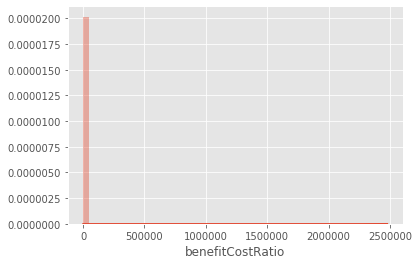

In [17]:
sns.distplot(df['benefitCostRatio'])

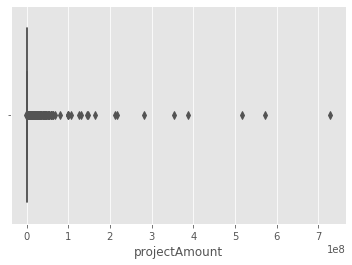

In [18]:
# Looks like projectAmount has outliers - Let's plot it
sns.boxplot(x=df['projectAmount'])

In [19]:
df['projectAmount'].sum()

24154158163.54

In [20]:
df['projectAmount'].median()

114895.5

In [21]:
# Do we have nulls?
df.isna().sum()

region                 0
stateNumberCode        0
programArea            0
projectAmount         20
programFy              0
benefitCostRatio       0
netValueBenefits    4921
Positive_ROI           0
dtype: int64

In [22]:
df['projectAmount'].fillna(0.0, axis = 0, inplace=True)
df['projectAmount'].value_counts()

40000.000      186
50000.000      184
100000.000     139
20000.000      120
25000.000      119
              ... 
1252647.000      1
840671.000       1
40254.000        1
31066.670        1
573403.000       1
Name: projectAmount, Length: 24108, dtype: int64

In [23]:
df['netValueBenefits'].fillna(0.0, axis = 0, inplace=True)
df['netValueBenefits'].value_counts()

0.000          14662
21420.000        318
1.000            152
276000.000        96
175000.000        36
               ...  
775151.000         1
387575.000         1
1222617.000        1
3624869.000        1
16552.000          1
Name: netValueBenefits, Length: 13097, dtype: int64

In [24]:
df[(df['projectAmount']<0)]

,region,stateNumberCode,programArea,projectAmount,programFy,benefitCostRatio,netValueBenefits,Positive_ROI
3795,5,27,HMGP,-1624776.000,1997,0.000,0.000,0
6134,1,25,HMGP,-110696.000,1991,0.000,0.000,0
22833,5,26,HMGP,-36500.000,1998,0.000,0.000,0


In [25]:
# The outliers need to be addressed
df = df[(df['projectAmount']>0)]

In [26]:
# Did we get all the nulls?
df.isna().sum()

region              0
stateNumberCode     0
programArea         0
projectAmount       0
programFy           0
benefitCostRatio    0
netValueBenefits    0
Positive_ROI        0
dtype: int64

In [27]:
df['benefitCostRatio'] = df['benefitCostRatio'].astype('int64')
df['projectAmount'] = df['projectAmount'].astype('int64')
df['netValueBenefits'] = df['netValueBenefits'].astype('int64')
df['programFy'] = df['programFy'].astype('int64')

## Vizualizations

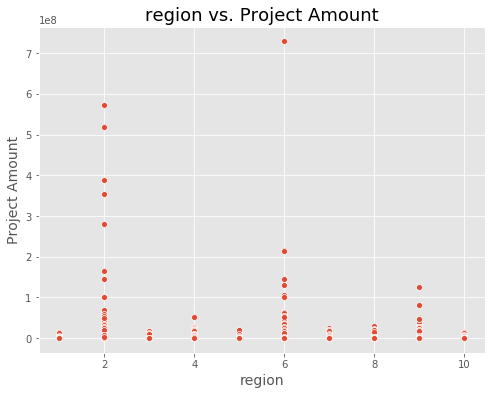

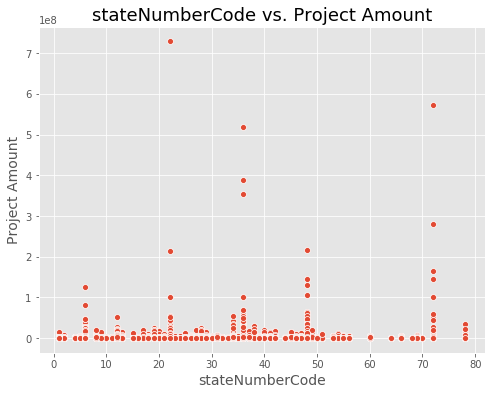

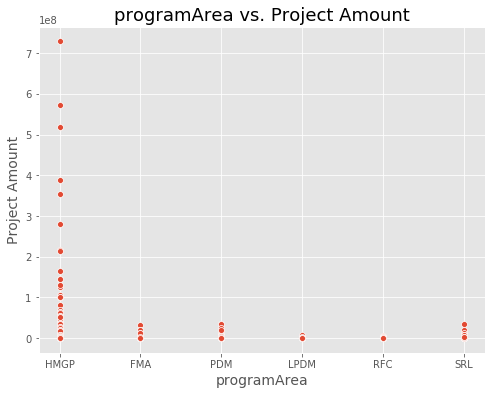

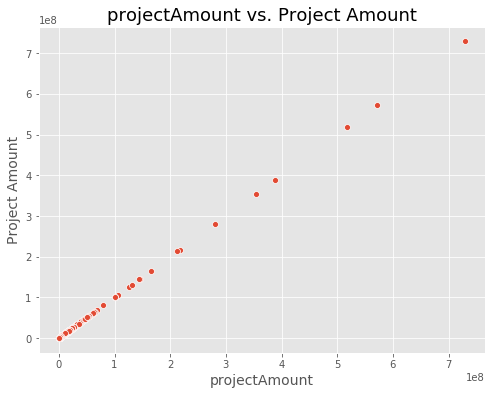

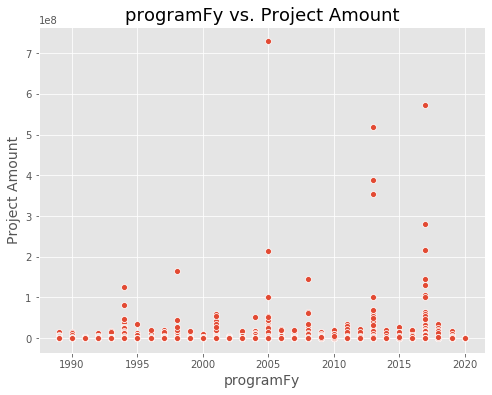

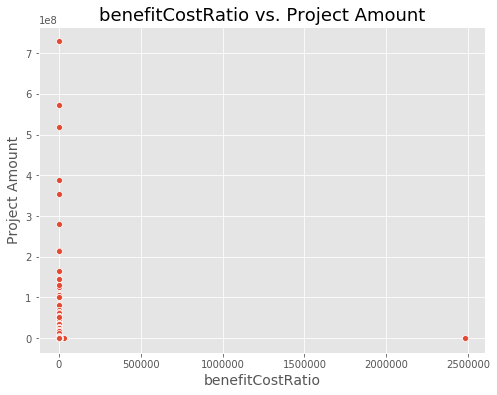

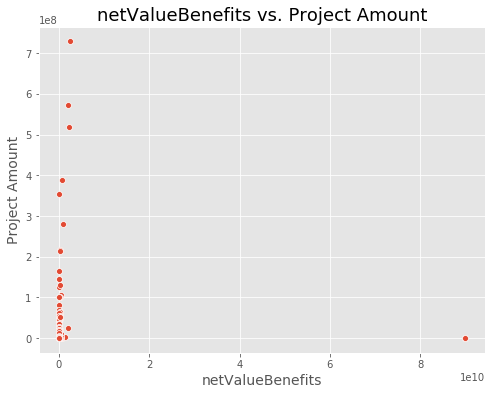

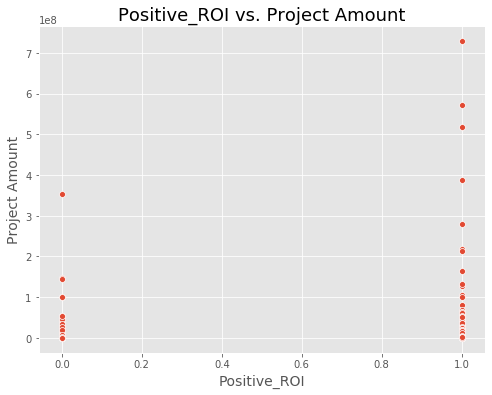

In [28]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [29]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [30]:
categorical_plots(df)

As we can see from the following vizuals above SRL () are the most costly hazard mitigation area that is being spent on

# Outlier Removal

In [31]:
# After researching outlier removal 
# and exploring our data it is best to do IQR type outlier removal methods

def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [32]:
# Function to make an outlier column which we will then remove outliers from
def outlierscolumn(df, columns, verbose=True):
    new_df = df.copy()
    for col in columns:
        outliers = outliersiqr(new_df[col])
        if verbose:
            print(f'{outliers.sum()} outliers found in {col}')
        new_df[f'{col}_outliers'] = outliers
    return new_df

In [33]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df2 = outlierscolumn(df, num_cols)

0 outliers found in region
0 outliers found in stateNumberCode
3833 outliers found in projectAmount
0 outliers found in programFy
4102 outliers found in benefitCostRatio
4561 outliers found in netValueBenefits
0 outliers found in Positive_ROI


In [34]:
df2.head()

,region,stateNumberCode,programArea,projectAmount,programFy,benefitCostRatio,netValueBenefits,Positive_ROI,region_outliers,stateNumberCode_outliers,projectAmount_outliers,programFy_outliers,benefitCostRatio_outliers,netValueBenefits_outliers,Positive_ROI_outliers
0,6,48,HMGP,402910,2011,4,2969310,1,False,False,False,False,True,True,False
1,5,18,HMGP,366071,2011,1,961452,1,False,False,False,False,False,False,False
2,7,19,HMGP,96965,2011,0,0,0,False,False,False,False,False,False,False
3,2,36,HMGP,5932500,2011,0,0,0,False,False,True,False,False,False,False
4,7,19,HMGP,34245,2011,0,0,0,False,False,False,False,False,False,False


In [35]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'stateNumberCode_outliers',
 'projectAmount_outliers',
 'programFy_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers',
 'Positive_ROI_outliers']

In [36]:
df2.shape

(29576, 15)

In [37]:
# Dropping columns that are either continous or boolean (yes or no, has or doesn't have)
#df2= df2.drop(columns=['region_outliers', 'stateNumberCode_outliers', 'programFy_outliers'])

In [38]:
# Creating a list of the outlier columns
outliercols = []
for col in df2.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

['region_outliers',
 'stateNumberCode_outliers',
 'projectAmount_outliers',
 'programFy_outliers',
 'benefitCostRatio_outliers',
 'netValueBenefits_outliers',
 'Positive_ROI_outliers']

In [39]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df2 = df2[(df2[col]==False)]
df2.shape

(21860, 15)

In [40]:
# Dropping the outlier columns that were added
for col in outliercols:
    df2.drop(columns=[col], axis=1, inplace=True)

In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 8 columns):
region              21860 non-null int64
stateNumberCode     21860 non-null int64
programArea         21860 non-null object
projectAmount       21860 non-null int64
programFy           21860 non-null int64
benefitCostRatio    21860 non-null int64
netValueBenefits    21860 non-null int64
Positive_ROI        21860 non-null int32
dtypes: int32(1), int64(6), object(1)
memory usage: 1.4+ MB


In [42]:
df=df2

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21860 entries, 1 to 29627
Data columns (total 8 columns):
region              21860 non-null int64
stateNumberCode     21860 non-null int64
programArea         21860 non-null object
projectAmount       21860 non-null int64
programFy           21860 non-null int64
benefitCostRatio    21860 non-null int64
netValueBenefits    21860 non-null int64
Positive_ROI        21860 non-null int32
dtypes: int32(1), int64(6), object(1)
memory usage: 1.4+ MB


In [44]:
df.region.value_counts()

4     5906
6     2800
5     2097
7     1776
1     1704
9     1689
3     1657
8     1580
2     1545
10    1106
Name: region, dtype: int64

In [45]:
df.stateNumberCode.value_counts()

12    1493
6     1242
1     1175
40     940
13     794
19     788
48     777
36     662
28     653
22     627
21     585
34     572
46     564
37     557
42     505
55     463
39     445
51     429
27     428
53     423
38     410
50     401
31     380
25     373
26     339
20     329
47     325
45     324
5      320
23     310
33     303
24     300
41     282
29     279
54     278
72     252
17     241
30     233
2      204
8      199
16     197
9      197
18     181
35     136
4      135
44     120
10     109
49     102
15      85
32      81
56      72
78      59
69      51
11      36
64      31
66      30
60      22
70       7
68       5
Name: stateNumberCode, dtype: int64

In [46]:
# Very important category as it shows why the mitigation is being done
df.programArea.value_counts()

HMGP    16109
PDM      3209
FMA      2106
LPDM      196
SRL       163
RFC        77
Name: programArea, dtype: int64

Text(0.5, 1.0, 'Program Area vs. Project Amount')

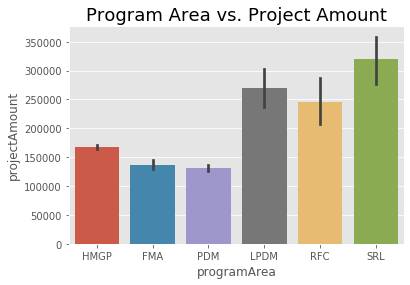

In [47]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

Text(0.5, 1.0, 'Program Area vs. Project Amount')

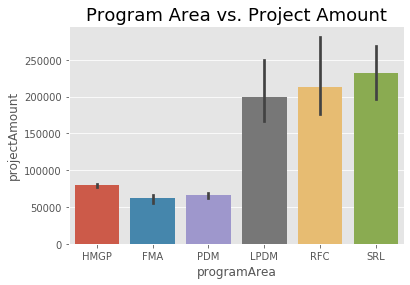

In [48]:
ax = sns.barplot(x="programArea", y="projectAmount", data=df, estimator=np.median)
ax.set_title('Program Area vs. Project Amount', fontsize = 18)

In [49]:
#df.projectIdentifier.value_counts()

In [50]:
df.projectAmount.value_counts()

40000     184
50000     179
100000    128
25000     119
20000     116
         ... 
93047       1
2748        1
206832      1
98400       1
65536       1
Name: projectAmount, Length: 16969, dtype: int64

In [51]:
df.programFy.value_counts()

2011    1665
2005    1299
2017    1215
2008    1107
1998    1061
2013     993
2007     990
2010     955
2009     938
2001     820
2004     806
2003     779
2016     777
2014     765
1997     719
2002     702
2015     700
2018     695
1996     665
1994     606
2000     518
2019     508
1999     502
2012     494
2006     408
1995     273
1993     268
1992     215
1990     162
1991     147
1989      97
2020      11
Name: programFy, dtype: int64

In [52]:
df = df[(df['projectAmount']>1998)]

In [53]:
df.benefitCostRatio.value_counts()

0    14049
1     6234
2     1342
Name: benefitCostRatio, dtype: int64

In [54]:
df.netValueBenefits.value_counts()

0         13795
21420       311
1           140
276000       82
175000       35
          ...  
372320        1
124214        1
105785        1
48445         1
215137        1
Name: netValueBenefits, Length: 6608, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21625 entries, 1 to 29627
Data columns (total 8 columns):
region              21625 non-null int64
stateNumberCode     21625 non-null int64
programArea         21625 non-null object
projectAmount       21625 non-null int64
programFy           21625 non-null int64
benefitCostRatio    21625 non-null int64
netValueBenefits    21625 non-null int64
Positive_ROI        21625 non-null int32
dtypes: int32(1), int64(6), object(1)
memory usage: 1.4+ MB


# One Hot Encoding and EDA

In [56]:
for col in df.columns:
    print(col, df[col].nunique())

region 10
stateNumberCode 59
programArea 6
projectAmount 16763
programFy 32
benefitCostRatio 3
netValueBenefits 6608
Positive_ROI 2


In [57]:
df['region'] = df['region'].astype('category') 
df['stateNumberCode'] = df['stateNumberCode'].astype('category') 
df['programFy'] = df['programFy'].astype('category')

In [58]:
pd.get_dummies(df)

,projectAmount,benefitCostRatio,netValueBenefits,Positive_ROI,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_9,region_10,stateNumberCode_1,stateNumberCode_2,stateNumberCode_4,stateNumberCode_5,stateNumberCode_6,stateNumberCode_8,stateNumberCode_9,stateNumberCode_10,stateNumberCode_11,stateNumberCode_12,stateNumberCode_13,stateNumberCode_15,stateNumberCode_16,stateNumberCode_17,stateNumberCode_18,stateNumberCode_19,stateNumberCode_20,stateNumberCode_21,stateNumberCode_22,stateNumberCode_23,stateNumberCode_24,stateNumberCode_25,stateNumberCode_26,stateNumberCode_27,stateNumberCode_28,stateNumberCode_29,...,stateNumberCode_72,stateNumberCode_78,programArea_FMA,programArea_HMGP,programArea_LPDM,programArea_PDM,programArea_RFC,programArea_SRL,programFy_1989,programFy_1990,programFy_1991,programFy_1992,programFy_1993,programFy_1994,programFy_1995,programFy_1996,programFy_1997,programFy_1998,programFy_1999,programFy_2000,programFy_2001,programFy_2002,programFy_2003,programFy_2004,programFy_2005,programFy_2006,programFy_2007,programFy_2008,programFy_2009,programFy_2010,programFy_2011,programFy_2012,programFy_2013,programFy_2014,programFy_2015,programFy_2016,programFy_2017,programFy_2018,programFy_2019,programFy_2020
1,366071,1,961452,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,96965,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,34245,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
9,25609,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
10,109900,0,108817,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29619,356900,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29620,25000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29622,8720,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
29626,21000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


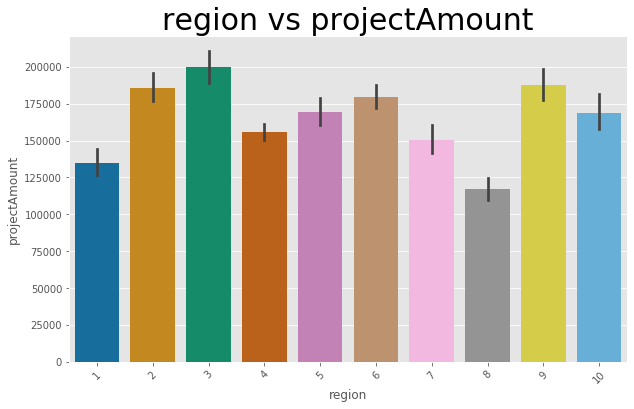

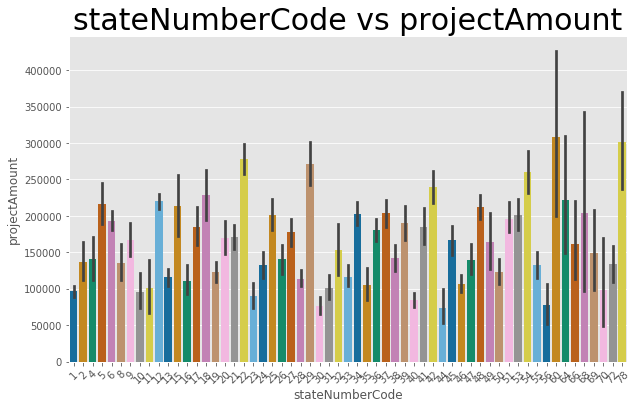

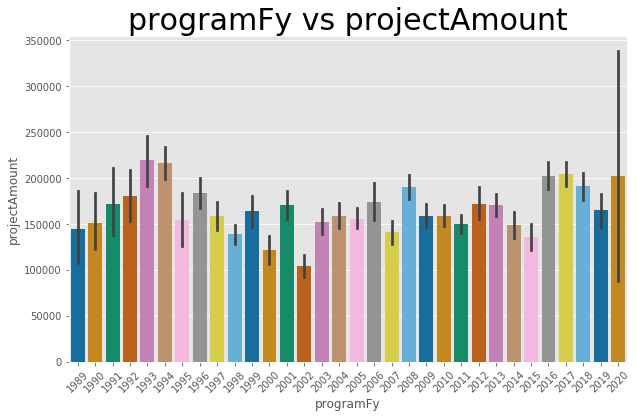

In [59]:
categorical_plots(df)

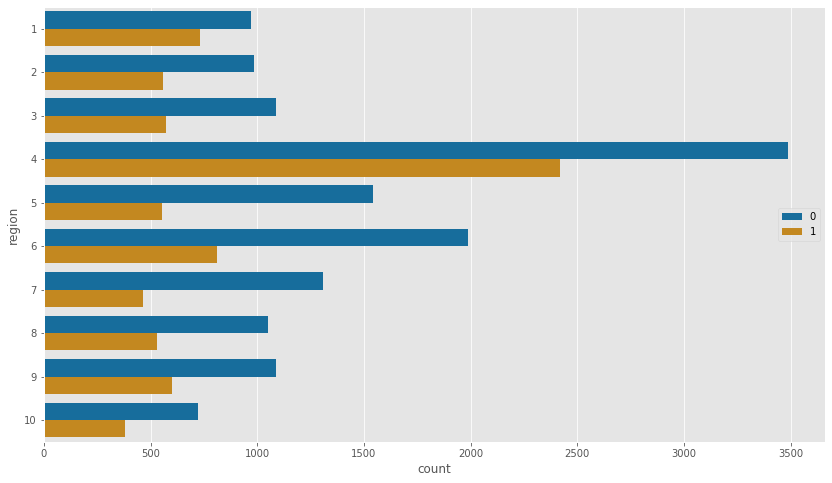

In [60]:
#Plot region vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['region'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

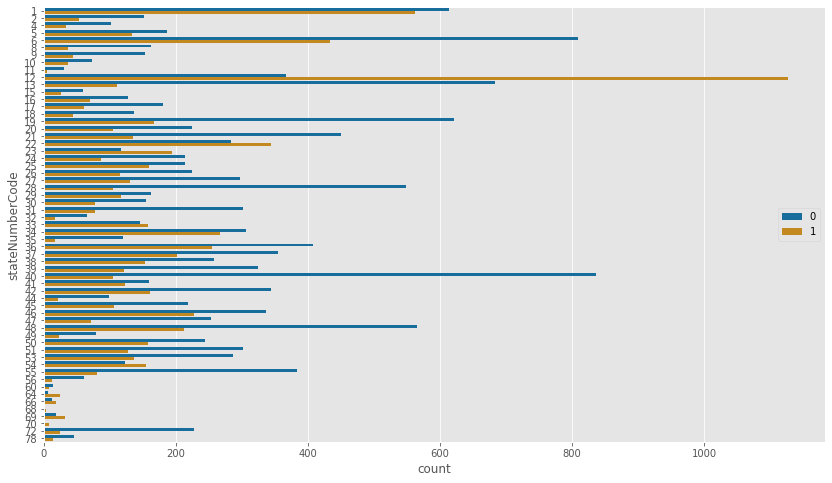

In [61]:
#Plot stateNumberCode vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['stateNumberCode'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

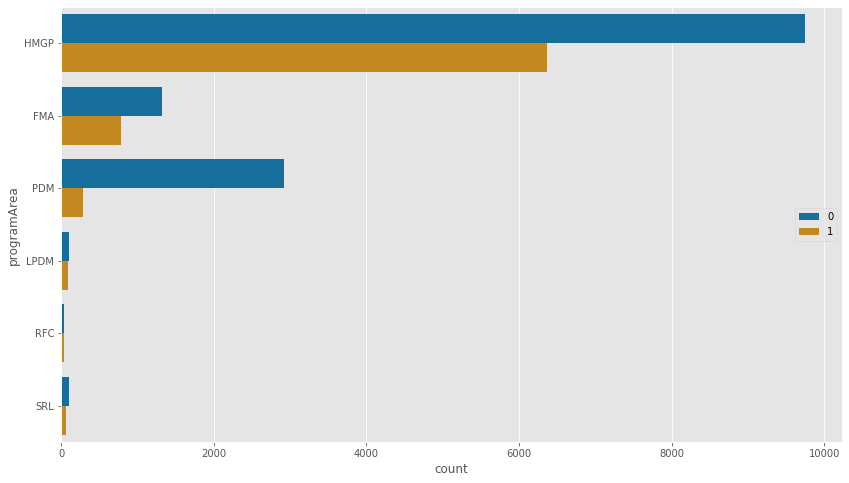

In [62]:
#Plot programArea vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['programArea'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

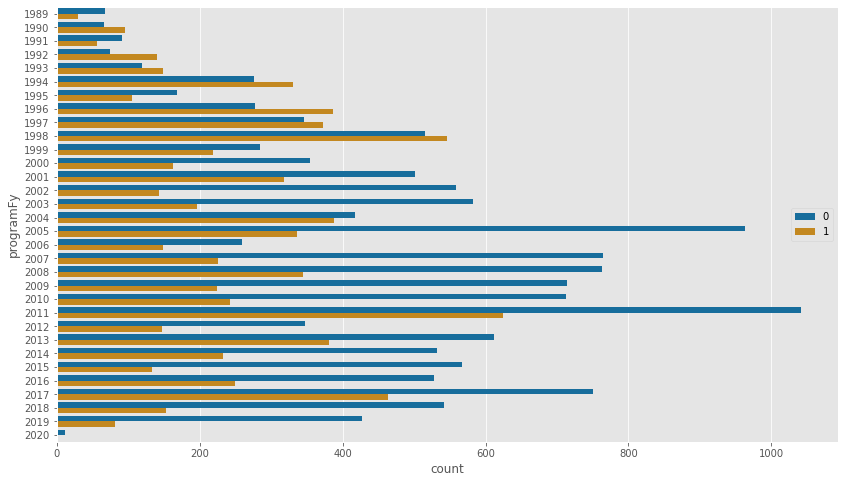

In [63]:
#Plot programFy vs. ROI
plt.figure(figsize=(14, 8))
sns.countplot(y=df2['programFy'], hue=df2['Positive_ROI'], palette="colorblind")
plt.legend(loc='center right')
plt.show()
# 0.0 = Not profitable & 1.0 = Profitable

In [64]:
df2 = pd.get_dummies(df)

In [65]:
df2.drop(columns=['benefitCostRatio'], inplace=True)

In [66]:
df=df2

# Logistic Model #1

In [67]:
#Split features and target
X = df.drop(columns=['Positive_ROI'], axis=1)
y = df['Positive_ROI']

# Normalizing the data
X = X.apply(lambda x : (x - x.min()) /(x.max() - x.min()), axis=0)
X.head()

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=123)
    
#Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [68]:
# Instantiate the model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit the model
logreg.fit(X_train, y_train)


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [69]:
# Generate predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [70]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 194 correct, ~ 85% accuracy

0    16381
1      919
Name: Positive_ROI, dtype: int64
------------------------------------
0   0.947
1   0.053
Name: Positive_ROI, dtype: float64


In [71]:
# We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print('------------------------------------')
print(pd.Series(residuals).value_counts(normalize=True))
# 62 correct, ~ 82% accuracy

0    4085
1     240
Name: Positive_ROI, dtype: int64
------------------------------------
0   0.945
1   0.055
Name: Positive_ROI, dtype: float64


In [72]:
#Create function to easily build models and display results
def build_model(classifier, X_train, X_test, y_train,  y_test):
    '''Build classification model, returning classification report, train and test accuracy, and confusion matrix.
    
    Keyword arguments: 
    classifier -- classification algorithm
    predictors -- X, features
    labels -- y, target
    '''
    
    #Create variables that can be called outside function
    #build_model.X_train = X_train
    #build_model.X_test = X_test
    #build_model.y_train = y_train
    #build_model.y_test = y_test
    
    #Fit model
    classifier.fit(X_train, y_train)
    #score = np.mean(cross_val_score(classifier, X, y, cv=5, scoring='recall'))

    #Create predictions
    y_hat_train = classifier.predict(X_train)
    y_hat_test = classifier.predict(X_test)
    
    #Create variables that can be called outside function
    #build_model.y_hat_train = y_hat_train
    #build_model.y_hat_test = y_hat_test
    
    #Print classification report
    print('Train Classification Report\n', classification_report(y_train, y_hat_train))
    print('Test Classification Report\n', classification_report(y_test, y_hat_test))
    
    print('Train Accuracy:', round(accuracy_score(y_train, y_hat_train), 3))
    print('Test Accuracy:', round(accuracy_score(y_test, y_hat_test), 3))
    #print('Cross Validation Recall', round(score, 3))
    
    #Create a results dataframe
    #results = pd.DataFrame([[str(model), round(accuracy_score(y_train, y_hat_train), 3), 
     #                        round(accuracy_score(y_test, y_hat_test), 3), round(score, 3)]], 
      #                    columns=['Model', 'Train_Accuracy', 'Test_Accuracy', 'Cross_Val_Recall'])
    #build_model.results = results
    
    #Plot Confusion Matrices
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))
    plot_confusion_matrix(classifier, X_train, y_train,
                     cmap=plt.cm.Blues, ax=axes[0], normalize='true')
    fig.suptitle('Train & Test Confusion Matrices', fontsize=16);
    
    plot_confusion_matrix(classifier, X_test, y_test,
                     cmap=plt.cm.Blues, ax=axes[1], normalize='true')
    plt.subplots_adjust(wspace=0.4)
    return classifier    

Train Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     11302
           1       0.96      0.88      0.92      5998

    accuracy                           0.95     17300
   macro avg       0.95      0.93      0.94     17300
weighted avg       0.95      0.95      0.95     17300

Test Classification Report
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      2747
           1       0.96      0.88      0.92      1578

    accuracy                           0.94      4325
   macro avg       0.95      0.93      0.94      4325
weighted avg       0.94      0.94      0.94      4325

Train Accuracy: 0.946
Test Accuracy: 0.944


LogisticRegression()

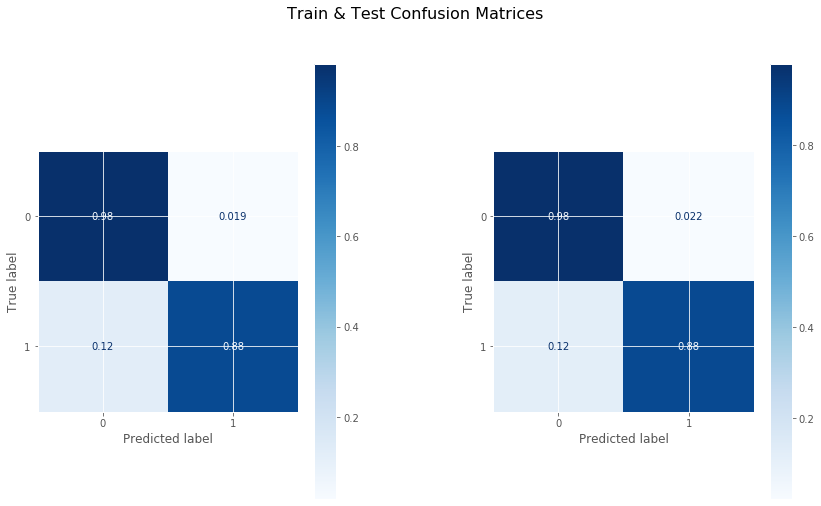

In [73]:
log_reg = LogisticRegression()
build_model(log_reg, X_train, X_test, y_train,  y_test)

In [74]:
features = '+'.join(df.drop('benefitCostRatio', axis = 1).columns)
formula = 'benefitCostRatio ~' + features
model1 = smf.ols(formula, df).fit()
model1.summary()

KeyError: "['benefitCostRatio'] not found in axis"

In [ ]:
model1.params

In [ ]:
# QQ plot to see if our data is linear
fig1 = plt.figure(figsize = (12,6))
fig1 = sm.graphics.qqplot(model1.resid,fit=True, line='45');

In [ ]:
# Coment on qq plot
# R-squared .4

In [ ]:
# Now we can look again at programAmount to see if there are still extremes
df['benefitCostRatio'].head()

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df['benefitCostRatio'], bins='auto')

In [ ]:
df.hist(figsize = (14,14));

In [ ]:
# Creating a function that will create a joint plot to vizualize linearity against our target price
def jointplot(df, col, target = 'benefitCostRatio'):
    g = sns.jointplot(data = df, x = col, y = target, kind = 'reg')
    plt.suptitle(f"{col} vs. {target}");
    return g

for col in df.columns:
    try:
        jointplot(df, col)
    except: 
        print(col)

In [ ]:
# Function to make vizuals to show normality
def normalityplots (df, column):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    df[column].hist(bins = 30)
    plt.subplot(1,2,2)
    stats.probplot(df[column], dist = 'norm', plot = plt)
    plt.title('{}'.format(column))
    plt.show()

# Now let's see the results of the outlier removal
for column in df.columns:
    try: 
        normalityplots(df, column)
    except: 
        print(column)

In [ ]:
def model_fun(df, target='benefitCostRatio', test_size=0.25):
    X = df.drop([target], axis=1)
    y = df[[target]]    
# Defining training test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                        test_size=test_size, 
                                                        random_state=123)
# Defining df with the split data
    df_train = pd.concat([y_train, X_train], axis=1)
    df_test = pd.concat([y_test, X_test], axis=1) 
# Getting the categorical columns
    cat_cols = df_train.select_dtypes('category').columns
# Making the model summary
    features = '+'.join(df_train.drop(columns=target).columns)
# Looping through categoricals to make the formula
    for col in cat_cols:
        features = features.replace(col,f'C({col})')   
    formula = target + '~' + features
    model = smf.ols(formula, df_train).fit()
# QQ plot of the residuals for normality
    fig, axes = plt.subplots(ncols=2, figsize=(20, 5))
    sm.graphics.qqplot(model.resid, fit=True, line='45', ax=axes[0])
    axes[0].set_title('QQ Plot of Residuals', fontsize=20)
# Homoscedasticity of Residuals
    ax=axes[1]
    ax.scatter(df_train['benefitCostRatio'], model.resid)
    ax.axhline(0, color='red')
    axes[1].set_title('Homoscedasticity of Residuals', fontsize=20)
    plt.show();
# Getting the predicted y values from the model
    y_predicted = model.predict(X_test)
    
# Plotting a scatterplot of the training vs original test data prices e
    plt.figure(figsize=(20,5))
    g = sns.scatterplot(range(len(y_predicted[:200])), y_predicted[:200], 
                        label='Predicted Prices')
    g = sns.scatterplot(range(len(y_test[:200])), y_test.benefitCostRatio[:200], 
                        label='Actual Prices')

# Visual titles, labels, and legends of the plots
    plt.title('Comparison of predicted vs actual price', 
              fontdict={'fontsize':20})
    plt.xlabel('Values')
    plt.ylabel('Amount')
    plt.legend()
    plt.show();
# Generating the r2 for the test data to compare to the train data 
    r2_test = r2_score(y_test, y_predicted)
    print('Model test data R2 score:', r2_test)
# Displaying everything
    display(model.summary())
    return model

In [ ]:
functionmodel1 = model_fun(df)

# Hypertuning

## Low p-value removal

In [ ]:
# Function to identify the insignificant p-values
def bad_pvalues(model, verbose=True):
    
#     Pulling out the p-values and identifying the ones above .05
    pvalues = model.pvalues
    bad_features = pvalues[pvalues > .05]
    
#     Excluding the intercept in case it has a high p-value
    if 'Intercept' in bad_features:
        bad_features.remove('Intercept')
        
#      Printing a statement of the bad p-values
    if verbose:
        print(f'{len(bad_features)} bad p-values to be reviewed:\n' 
              + f'{bad_features}')
    return bad_features

In [ ]:
model2_bad_pvals = bad_pvalues(model1)

In [ ]:
# We can see from the low values that month has many low p-value features
df3 = df2.copy()
df3.drop(columns=(['programFy', 'stateNumberCode']), inplace=True)
df3.shape

In [ ]:
# Model summary to see the changes if significant
functionmodel3 = model_fun(df3)

# Model #2

In [ ]:
# Model summary to see the changes if significant
functionmodel2 = model_fun(df2)

# Model #3

## Multicolinearity Column/Feature Removal

In [ ]:
# Creating a heat map again to see our new data
corr3 = df3.iloc[:,2:] 
corr3.corr().abs().style.background_gradient(cmap='Reds')

### Limiting the project Amount to 400,000

In [ ]:
df = df[(df['projectAmount']<400000)]

In [ ]:
# Model summary to see the changes if significant
functionmodel3 = model_fun(df3)

# Model #4

## Removing more extreme outliers

In [ ]:
def outliersiqr(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    threshold = iqr * 1.5
    outliers = (data < q1 - threshold) | (data > q3 + threshold)
    outliers = pd.Series(outliers, index=data.index)
    return outliers

In [ ]:
# Feeding in the numerical columns for identifying outliers
num_cols = list(df3.select_dtypes('number').columns)

# Saving the new dataframe with outlier columns added
df4 = outlierscolumn(df3, num_cols)

In [ ]:
df4.head()

In [ ]:
# Creating a list of the outlier columns
outliercols = []
for col in df4.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

In [ ]:
# Creating a list of the outlier columns
outliercols = []
for col in df4.columns:
    if 'outliers' in col:
        outliercols.append(col)
outliercols

In [ ]:
# Filtering the outliers out of my dataframe and returning only the entries
# that are not outliers for any of the features
for col in outliercols:
    df4 = df4[(df4[col]==False)]
df4.shape

In [ ]:
# Dropping the outlier columns that were added
for col in outliercols:
    df4.drop(columns=[col], axis=1, inplace=True)

In [ ]:
df4.info()

In [ ]:
# Model summary to see the changes if significant
functionmodel4 = model_fun(df4)

**Even though we have signifcantly reduced the size of our dataset we have created a better model to work off of**

In [ ]:
functionmodel4.params

**Region is the largest determing factor in program cost while program areas are the least effective to the model**

In [ ]:
# Convert the coefficient series to a sorted dataframe

coeffs_df = functionmodel4.params.to_frame()
coeffs_df.columns = ['coefficients']
coeffs_df = coeffs_df.sort_values('coefficients', ascending = False)
coeffs_df.style.background_gradient(cmap = 'Reds').set_caption('Coefficients')

In [ ]:
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='region', y='projectAmount', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Project Amount', fontsize=15)
ax.set_title('Project Amount by Region', fontsize=20);

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(df4['region'], df4['projectAmount'])

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

In [ ]:
# Vizual to show that program area was the most closely correlated to increase in project amount
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='programArea', y='projectAmount', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Program Area', fontsize=15)
ax.set_ylabel('Project Amount', fontsize=15)
ax.set_title('Project Amount by Program Area', fontsize=20);

In [ ]:
# Vizual to show that program area was the most closely correlated to increase in project amount
# Setting a figure size and plotting
fig, ax = plt.subplots(figsize=(12,8))
sns.barplot(x='region', y='projectAmount', data=df4, palette="colorblind")

# Formatting the y-axis ticks to show as money
fmt_money = '${x:,.0f}'
tick_money = mtick.StrMethodFormatter(fmt_money)
ax.yaxis.set_major_formatter(tick_money)

# Setting title and labels
ax.set_xlabel('Region', fontsize=15)
ax.set_ylabel('Project Amount', fontsize=15)
ax.set_title('Project Amount by Region', fontsize=20);

# EDA/Visuals for Presentation

In [ ]:
def scatterplot(col):
    ax = plt.figure(figsize = (8,6))
    ax = sns.scatterplot(x = df[col], y = df['projectAmount'])
    ax.set_title('{} vs. Project Amount'.format(col), fontsize = 18)
    ax.set_xlabel('{}'.format(col), fontsize = 14)
    ax.set_ylabel('Project Amount', fontsize = 14);

for col in df:

    scatterplot(col)

In [ ]:
# Plotting Price with the categories:
def categorical_plots(df):
    for col in df.select_dtypes('category'):
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=col, y='projectAmount', data=df, palette="colorblind")
        ax.set_title(f"{col} vs projectAmount", fontsize=30)
        plt.xticks(rotation=45)
        plt.show()

In [ ]:
categorical_plots(df)

# Conclusions

- More funds should be allocated to hazard mitigation in all categories as natural disasters and subsequently recovery are increasing

**Less common Natural Disaster Preparedness**

- The costs of COVID-19 surpass all categories of natural disaster recovery costs**

- Volcanoes were second highest cost even though they are less common natural disaster**
